In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
def train_temperature_conversion_model():
    # Generating Data
    celsius = np.linspace(-100, 100, 1000)  # Generate 1000 data points from -100 to 100 degrees Celsius
    fahrenheit = (celsius * 9/5) + 32  # Convert to Fahrenheit

    # Prepare the data for training
    X = celsius.reshape(-1, 1)  # Features (Celsius)
    y = fahrenheit  # Target (Fahrenheit)

    # Train the Model
    mse_values = []
    data_sizes = range(10, 1001, 10)  # Incrementally increasing data sizes

    for size in data_sizes:
        X_subset = X[:size]
        y_subset = y[:size]

        model = LinearRegression()
        model.fit(X_subset, y_subset)

        y_pred = model.predict(X_subset)
        mse = mean_squared_error(y_subset, y_pred)
        mse_values.append(mse)

    #Plotting Model Accuracy Over Time
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, mse_values, marker='o')
    plt.title('Model Accuracy Over Time')
    plt.xlabel('Number of Data Points')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

    return model

In [3]:
def convert_celsius_to_fahrenheit(model, celsius_value):
    celsius_array = np.array([[celsius_value]])
    fahrenheit_value = model.predict(celsius_array)
    return fahrenheit_value[0]


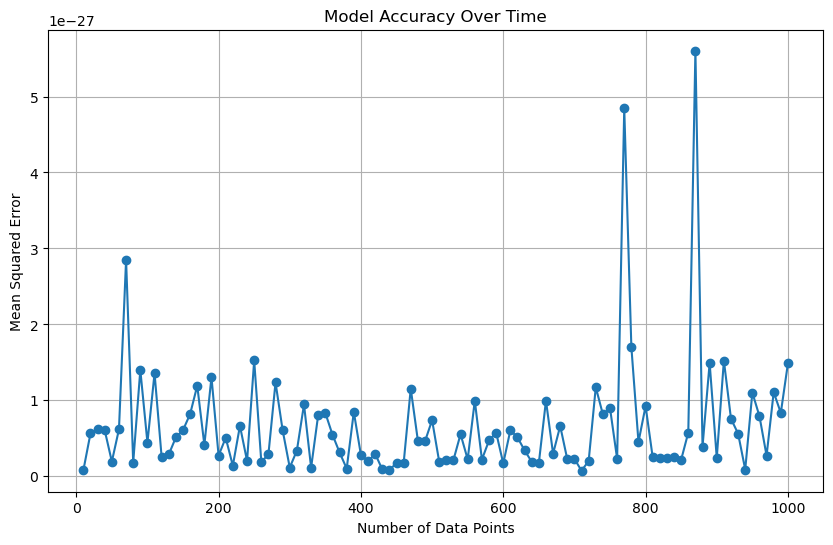

Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  12


********************
12.0 degrees Celsius is 53.60 degrees Fahrenheit.
********************


Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  40


********************
40.0 degrees Celsius is 104.00 degrees Fahrenheit.
********************


Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  -40


********************
-40.0 degrees Celsius is -40.00 degrees Fahrenheit.
********************


Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  -273


********************
-273.0 degrees Celsius is -459.40 degrees Fahrenheit.
********************


Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  500


********************
500.0 degrees Celsius is 932.00 degrees Fahrenheit.
********************


Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  0


********************
0.0 degrees Celsius is 32.00 degrees Fahrenheit.
********************


Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit):  n


Exiting the program.


In [4]:
# Train the model and plot the accuracy
model = train_temperature_conversion_model()

while True:
    celsius_value = input("Enter temperature value in Celsius to convert to Fahrenheit (or type any letter to exit): ")
    if celsius_value.isalpha():
        print("Exiting the program.")
        break
    try:
        celsius_value = float(celsius_value)
        fahrenheit_value = convert_celsius_to_fahrenheit(model, celsius_value)
        print("*" * 20)
        print(f"{celsius_value} degrees Celsius is {fahrenheit_value:.2f} degrees Fahrenheit.")
        print("*" * 20)
    except ValueError:
        print("Please enter a valid numeric value for Celsius.")